Dataset loaded: 415 samples, 6 features.

Features normalized.

Evaluating cluster counts (k):
 k |      Inertia | Dunn Index
---------------------------------
 2 |      2070.43 |     0.3695
 3 |      1895.37 |     0.1729
 4 |      1663.02 |     0.1782
 5 |      1583.31 |     0.1782
 6 |      1463.73 |     0.1782
 7 |      1384.76 |     0.1782
 8 |      1295.52 |     0.1943
 9 |      1238.72 |     0.1943
10 |      1178.07 |     0.2042
11 |      1110.99 |     0.1960
12 |      1067.27 |     0.2032
13 |      1023.47 |     0.1972
14 |       990.46 |     0.1960
15 |       947.01 |     0.2032
16 |       905.12 |     0.2032
17 |       887.10 |     0.2190
18 |       837.22 |     0.2222
19 |       811.35 |     0.2307
20 |       794.35 |     0.2197


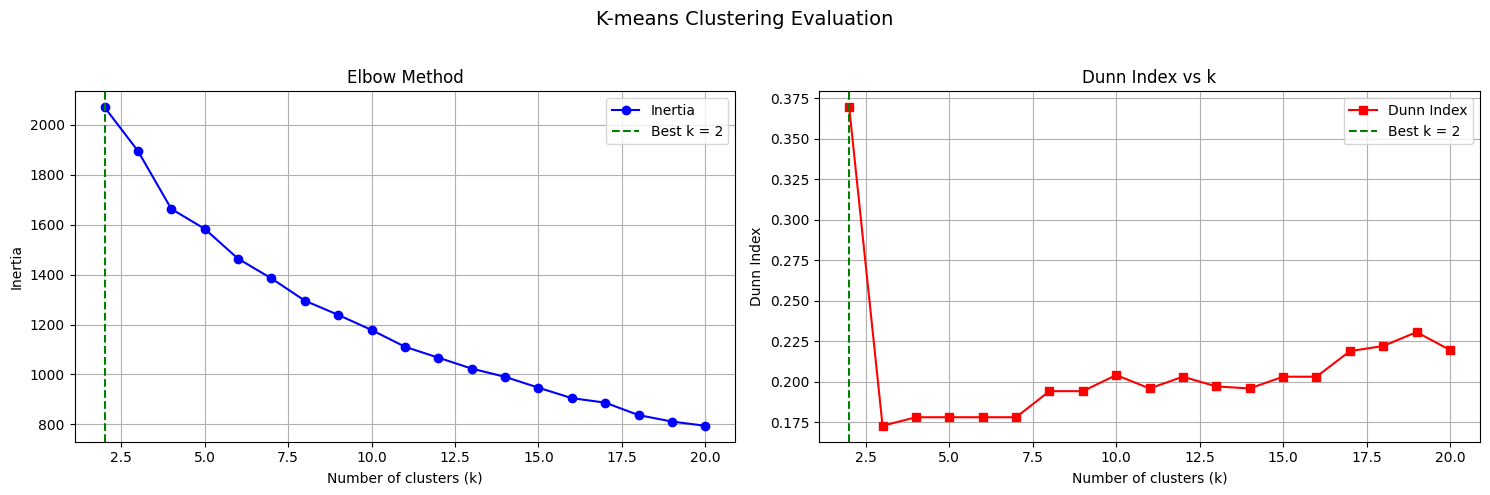


 Best number of clusters (Elbow method): 2
 Dunn Index for best k: 0.3695


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

df = pd.read_csv("train_data_full.csv")
X = df.drop(columns=["Class", "ID"])
print(f"Dataset loaded: {X.shape[0]} samples, {X.shape[1]} features.\n")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Features normalized.\n")

def dunn_index(X, labels):
    clusters = np.unique(labels)
    min_intercluster = np.inf
    max_intracluster = 0
    
    for c in clusters:
        points_in_cluster = X[labels == c]
        if len(points_in_cluster) > 1:
            distances = cdist(points_in_cluster, points_in_cluster)
            max_dist = np.max(distances)
            if max_dist > max_intracluster:
                max_intracluster = max_dist
    
    for i, c1 in enumerate(clusters):
        for c2 in clusters[i+1:]:
            points_c1 = X[labels == c1]
            points_c2 = X[labels == c2]
            distances = cdist(points_c1, points_c2)
            min_dist = np.min(distances)
            if min_dist < min_intercluster:
                min_intercluster = min_dist
    
    if max_intracluster == 0:
        return 0
    return min_intercluster / max_intracluster

max_k = 20
inertias = []
dunns = []

print("Evaluating cluster counts (k):")
print(f"{'k':>2} | {'Inertia':>12} | {'Dunn Index':>10}")
print("-"*33)

for k in range(2, max_k+1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    labels = kmeans.fit_predict(X_scaled)
    inertia = kmeans.inertia_
    dunn = dunn_index(X_scaled, labels)
    
    inertias.append(inertia)
    dunns.append(dunn)
    
    print(f"{k:>2} | {inertia:12.2f} | {dunn:10.4f}")

diffs = np.diff(inertias)
elbow_k = np.argmax(diffs[:-1] - diffs[1:]) + 2

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_k+1), inertias, marker='o', color='blue', label='Inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.axvline(x=elbow_k, color='green', linestyle='--', label=f'Best k = {elbow_k}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, max_k+1), dunns, marker='s', color='red', label='Dunn Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Dunn Index')
plt.title('Dunn Index vs k')
plt.grid(True)
plt.axvline(x=elbow_k, color='green', linestyle='--', label=f'Best k = {elbow_k}')
plt.legend()

plt.suptitle('K-means Clustering Evaluation', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

final_dunn = dunns[elbow_k-2]
print("\n" + "="*44)
print(f" Best number of clusters (Elbow method): {elbow_k}")
print(f" Dunn Index for best k: {final_dunn:.4f}")
print("="*44)